
**Support vector regressor**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_regression
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

<Axes: xlabel='0', ylabel='1'>

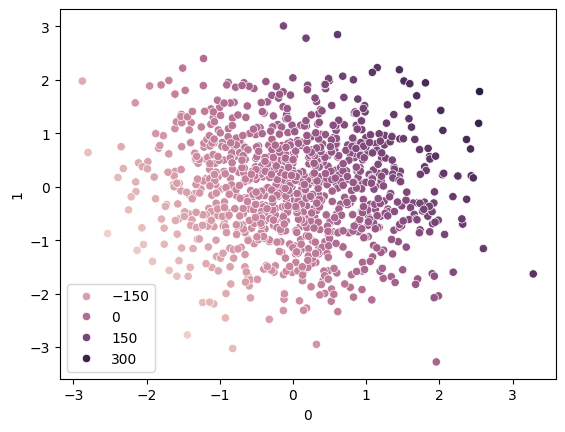

In [4]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [6]:
from sklearn.svm import SVR

In [7]:
svr=SVR(kernel='linear')
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [8]:
svr.coef_

array([[93.43071305, 49.10290736]])

In [9]:
## Prediction
y_pred=svr.predict(X_test)

In [10]:
from sklearn.metrics import r2_score

In [11]:
print(r2_score(y_test,y_pred))

0.9989135446623945


In [12]:
## Hyperparametere Tuning With SVR

In [13]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [14]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.674 total time=   0.1s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.694 total time=   0.1s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.669 total time=   0.1s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.673 total time=   0.1s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.685 total time=   0.1s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.674 total time=   0.1s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.694 total time=   0.1s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.669 total time=   0.1s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.673 total time=   0.1s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.685 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [15]:
grid.best_params_

{'C': 10, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [16]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9989730335544175
